# Getting Started

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the data from .csv file

In [2]:
df = pd.read_csv('Test Cricket.csv')

In [3]:
df.head(10)

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test
5,Pakistan,India,drawn,NaN,Lahore,"Jan 13-17, 2006",Test # 1781,Test
6,India,Pakistan,Pakistan,168 runs,Bengaluru,"Mar 24-28, 2005",Test # 1743,Test
7,India,Pakistan,India,195 runs,Eden Gardens,"Mar 16-20, 2005",Test # 1741,Test
8,India,Pakistan,drawn,NaN,Mohali,"Mar 8-12, 2005",Test # 1738,Test
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,"Apr 13-16, 2004",Test # 1697,Test


# Data Cleaning

In [4]:
def extract_match_dates(date_str):
    try:
        date_str = date_str.replace(',', '')
        parts = date_str.split()
        
        if '-' in parts[0]:
            start_month = parts[0].split('-')[0]
            start_day = parts[0].split('-')[1]
            end_month = parts[1]
            end_day = parts[2]
            year = parts[3]
        else: 
            start_month = parts[0]
            start_day = parts[1].split('-')[0]
            end_day = parts[1].split('-')[1]
            end_month = parts[0]
            year = parts[2]

        start_date_str = f"{start_day} {start_month} {year}"
        end_date_str = f"{end_day} {end_month} {year}"
        
        start_date = pd.to_datetime(start_date_str, format='%d %b %Y', errors='coerce')
        end_date = pd.to_datetime(end_date_str, format='%d %b %Y', errors='coerce')
        
        return pd.Series([start_date, end_date])
    
    except:
        return pd.Series([pd.NaT, pd.NaT])


In [5]:
df[['Match Start Date', 'Match End Date']] = df['Match Date'].apply(extract_match_dates)
df = df.drop(['Match Date'],axis=1)
df.head(10)

,Team 1,Team 2,Winner,Margin,Ground,Scorecard,Format,Match Start Date,Match End Date
0,India,Pakistan,drawn,NaN,Bengaluru,Test # 1852,Test,2007-12-08,2007-12-12
1,India,Pakistan,drawn,NaN,Eden Gardens,Test # 1850,Test,NaT,NaT
2,India,Pakistan,India,6 wickets,Delhi,Test # 1849,Test,2007-11-22,2007-11-26
3,Pakistan,India,Pakistan,341 runs,Karachi,Test # 1783,Test,NaT,NaT
4,Pakistan,India,drawn,NaN,Faisalabad,Test # 1782,Test,2006-01-21,2006-01-25
5,Pakistan,India,drawn,NaN,Lahore,Test # 1781,Test,2006-01-13,2006-01-17
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test # 1743,Test,2005-03-24,2005-03-28
7,India,Pakistan,India,195 runs,Eden Gardens,Test # 1741,Test,2005-03-16,2005-03-20
8,India,Pakistan,drawn,NaN,Mohali,Test # 1738,Test,2005-03-08,2005-03-12
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test # 1697,Test,2004-04-13,2004-04-16


Missing Values & Structure simpler

In [6]:
df['Margin'] = df['Margin'].fillna(0)

In [7]:
df.head(10)

,Team 1,Team 2,Winner,Margin,Ground,Scorecard,Format,Match Start Date,Match End Date
0,India,Pakistan,drawn,0,Bengaluru,Test # 1852,Test,2007-12-08,2007-12-12
1,India,Pakistan,drawn,0,Eden Gardens,Test # 1850,Test,NaT,NaT
2,India,Pakistan,India,6 wickets,Delhi,Test # 1849,Test,2007-11-22,2007-11-26
3,Pakistan,India,Pakistan,341 runs,Karachi,Test # 1783,Test,NaT,NaT
4,Pakistan,India,drawn,0,Faisalabad,Test # 1782,Test,2006-01-21,2006-01-25
5,Pakistan,India,drawn,0,Lahore,Test # 1781,Test,2006-01-13,2006-01-17
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test # 1743,Test,2005-03-24,2005-03-28
7,India,Pakistan,India,195 runs,Eden Gardens,Test # 1741,Test,2005-03-16,2005-03-20
8,India,Pakistan,drawn,0,Mohali,Test # 1738,Test,2005-03-08,2005-03-12
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test # 1697,Test,2004-04-13,2004-04-16


Gettiing result column

In [8]:
df['Result'] = df['Winner'].apply(
    lambda x: 'Not Found' if x == 'drawn'  else 'Found'
)

In [9]:
df.head(10)

,Team 1,Team 2,Winner,Margin,Ground,Scorecard,Format,Match Start Date,Match End Date,Result
0,India,Pakistan,drawn,0,Bengaluru,Test # 1852,Test,2007-12-08,2007-12-12,Not Found
1,India,Pakistan,drawn,0,Eden Gardens,Test # 1850,Test,NaT,NaT,Not Found
2,India,Pakistan,India,6 wickets,Delhi,Test # 1849,Test,2007-11-22,2007-11-26,Found
3,Pakistan,India,Pakistan,341 runs,Karachi,Test # 1783,Test,NaT,NaT,Found
4,Pakistan,India,drawn,0,Faisalabad,Test # 1782,Test,2006-01-21,2006-01-25,Not Found
5,Pakistan,India,drawn,0,Lahore,Test # 1781,Test,2006-01-13,2006-01-17,Not Found
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test # 1743,Test,2005-03-24,2005-03-28,Found
7,India,Pakistan,India,195 runs,Eden Gardens,Test # 1741,Test,2005-03-16,2005-03-20,Found
8,India,Pakistan,drawn,0,Mohali,Test # 1738,Test,2005-03-08,2005-03-12,Not Found
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test # 1697,Test,2004-04-13,2004-04-16,Found


Further Cleaning

In [10]:
df['Winner'] = df['Winner'].replace('drawn','Drawn')

In [11]:
df = df.dropna(subset=['Match Start Date', 'Match End Date'])

In [12]:
df.head(10)

,Team 1,Team 2,Winner,Margin,Ground,Scorecard,Format,Match Start Date,Match End Date,Result
0,India,Pakistan,Drawn,0,Bengaluru,Test # 1852,Test,2007-12-08,2007-12-12,Not Found
2,India,Pakistan,India,6 wickets,Delhi,Test # 1849,Test,2007-11-22,2007-11-26,Found
4,Pakistan,India,Drawn,0,Faisalabad,Test # 1782,Test,2006-01-21,2006-01-25,Not Found
5,Pakistan,India,Drawn,0,Lahore,Test # 1781,Test,2006-01-13,2006-01-17,Not Found
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test # 1743,Test,2005-03-24,2005-03-28,Found
7,India,Pakistan,India,195 runs,Eden Gardens,Test # 1741,Test,2005-03-16,2005-03-20,Found
8,India,Pakistan,Drawn,0,Mohali,Test # 1738,Test,2005-03-08,2005-03-12,Not Found
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test # 1697,Test,2004-04-13,2004-04-16,Found
10,Pakistan,India,Pakistan,9 wickets,Lahore,Test # 1695,Test,2004-04-05,2004-04-08,Found
12,India,Pakistan,Pakistan,46 runs,Eden Gardens,Test # 1444,Test,1999-02-16,1999-02-20,Found


 Decades

In [13]:
def dec(x):
    if pd.isna(x):
        return None
    
    year = x.year
    decade = (year // 10) * 10
    return f"{decade}s"

In [14]:
df['Decade'] = df['Match Start Date'].apply(dec)

In [15]:
df.head(10)

,Team 1,Team 2,Winner,Margin,Ground,Scorecard,Format,Match Start Date,Match End Date,Result,Decade
0,India,Pakistan,Drawn,0,Bengaluru,Test # 1852,Test,2007-12-08,2007-12-12,Not Found,2000s
2,India,Pakistan,India,6 wickets,Delhi,Test # 1849,Test,2007-11-22,2007-11-26,Found,2000s
4,Pakistan,India,Drawn,0,Faisalabad,Test # 1782,Test,2006-01-21,2006-01-25,Not Found,2000s
5,Pakistan,India,Drawn,0,Lahore,Test # 1781,Test,2006-01-13,2006-01-17,Not Found,2000s
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test # 1743,Test,2005-03-24,2005-03-28,Found,2000s
7,India,Pakistan,India,195 runs,Eden Gardens,Test # 1741,Test,2005-03-16,2005-03-20,Found,2000s
8,India,Pakistan,Drawn,0,Mohali,Test # 1738,Test,2005-03-08,2005-03-12,Not Found,2000s
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test # 1697,Test,2004-04-13,2004-04-16,Found,2000s
10,Pakistan,India,Pakistan,9 wickets,Lahore,Test # 1695,Test,2004-04-05,2004-04-08,Found,2000s
12,India,Pakistan,Pakistan,46 runs,Eden Gardens,Test # 1444,Test,1999-02-16,1999-02-20,Found,1990s


# Insights of the matches

Result found

Text(0, 0.5, 'Match Count')

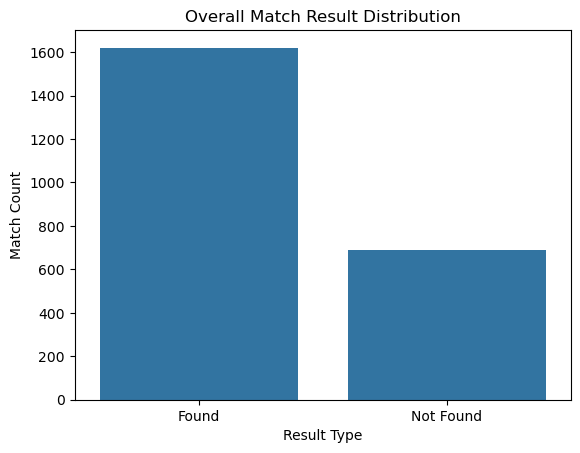

In [16]:
sns.countplot(data=df, x='Result', order=['Found','Not Found'])
plt.title('Overall Match Result Distribution')
plt.xlabel('Result Type')
plt.ylabel('Match Count')

Team with most number of Wins

In [26]:
wins = df.groupby('Winner').size().reset_index()
wins.columns = ['Team','Wins']
wins.drop(3, axis=0, inplace=True)
wins.drop(13, axis=0, inplace=True)
wins.drop(14, axis=0, inplace=True)
wins

,Team,Wins
0,Afghanistan,4
1,Australia,355
2,Bangladesh,18
4,England,367
5,India,163
6,Ireland,3
7,New Zealand,116
8,Pakistan,138
9,South Africa,167
10,Sri Lanka,99


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Afghanistan'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Bangladesh'),
  Text(3, 0, 'England'),
  Text(4, 0, 'India'),
  Text(5, 0, 'Ireland'),
  Text(6, 0, 'New Zealand'),
  Text(7, 0, 'Pakistan'),
  Text(8, 0, 'South Africa'),
  Text(9, 0, 'Sri Lanka'),
  Text(10, 0, 'West Indies'),
  Text(11, 0, 'Zimbabwe')])

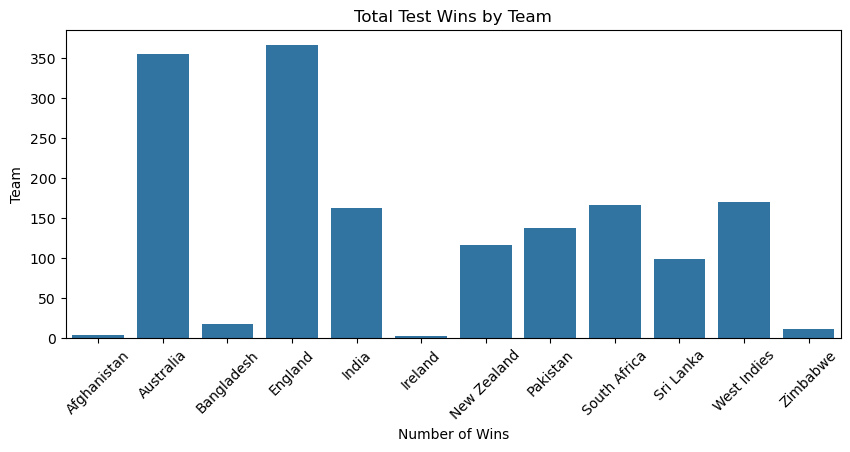

In [27]:
plt.figure(figsize=(10,4))
sns.barplot(x='Team',y='Wins',data=wins)
plt.title('Total Test Wins by Team')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.xticks(rotation=45)

Test Cricket Evolution

In [28]:
dec = df.groupby('Decade').size().reset_index()
dec.columns = ['Decade','Matches']
dec

,Decade,Matches
0,1870s,2
1,1880s,26
2,1890s,27
3,1900s,38
4,1910s,24
5,1920s,42
6,1930s,76
7,1940s,38
8,1950s,140
9,1960s,155


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '1870s'),
  Text(1, 0, '1880s'),
  Text(2, 0, '1890s'),
  Text(3, 0, '1900s'),
  Text(4, 0, '1910s'),
  Text(5, 0, '1920s'),
  Text(6, 0, '1930s'),
  Text(7, 0, '1940s'),
  Text(8, 0, '1950s'),
  Text(9, 0, '1960s'),
  Text(10, 0, '1970s'),
  Text(11, 0, '1980s'),
  Text(12, 0, '1990s'),
  Text(13, 0, '2000s'),
  Text(14, 0, '2010s'),
  Text(15, 0, '2020s')])

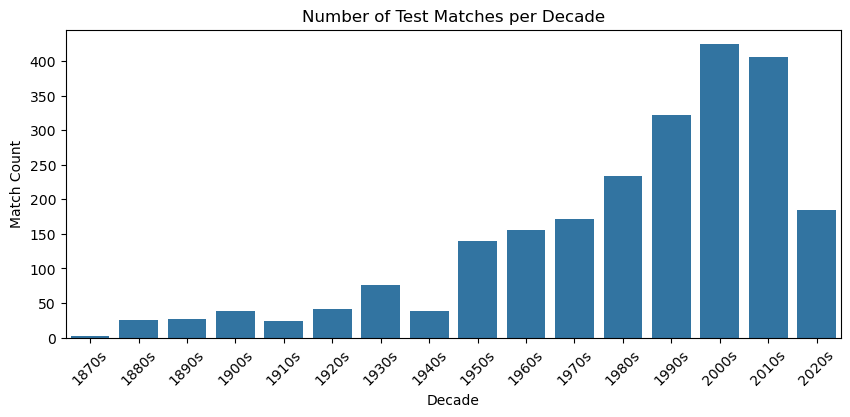

In [29]:
plt.figure(figsize=(10,4))
sns.barplot(x='Decade', y='Matches', data=dec)
plt.title('Number of Test Matches per Decade')
plt.xlabel('Decade')
plt.ylabel('Match Count')
plt.xticks(rotation=45)

Game evolution in playing agressive cricket.

In [32]:
drw = df.query('Winner == "Drawn"')

In [33]:
drw = drw.groupby('Decade').size().reset_index()
drw.columns = ['Decade','Draws']
drw

,Decade,Draws
0,1880s,3
1,1890s,5
2,1900s,10
3,1910s,4
4,1920s,15
5,1930s,34
6,1940s,20
7,1950s,42
8,1960s,73
9,1970s,74


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '1880s'),
  Text(1, 0, '1890s'),
  Text(2, 0, '1900s'),
  Text(3, 0, '1910s'),
  Text(4, 0, '1920s'),
  Text(5, 0, '1930s'),
  Text(6, 0, '1940s'),
  Text(7, 0, '1950s'),
  Text(8, 0, '1960s'),
  Text(9, 0, '1970s'),
  Text(10, 0, '1980s'),
  Text(11, 0, '1990s'),
  Text(12, 0, '2000s'),
  Text(13, 0, '2010s'),
  Text(14, 0, '2020s')])

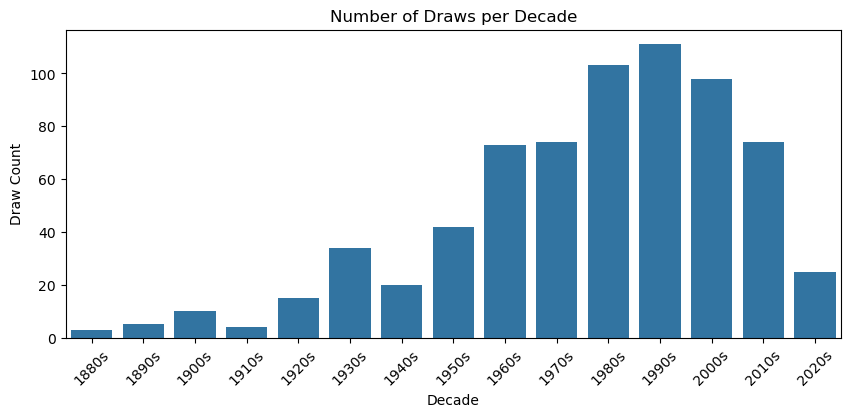

In [34]:
plt.figure(figsize=(10,4))
sns.barplot(x='Decade', y='Draws', data=drw)
plt.title('Number of Draws per Decade')
plt.xlabel('Decade')
plt.ylabel('Draw Count')
plt.xticks(rotation=45)

Most played venues

In [35]:
venue_counts = df['Ground'].value_counts().head(10)

Text(0, 0.5, 'Ground')

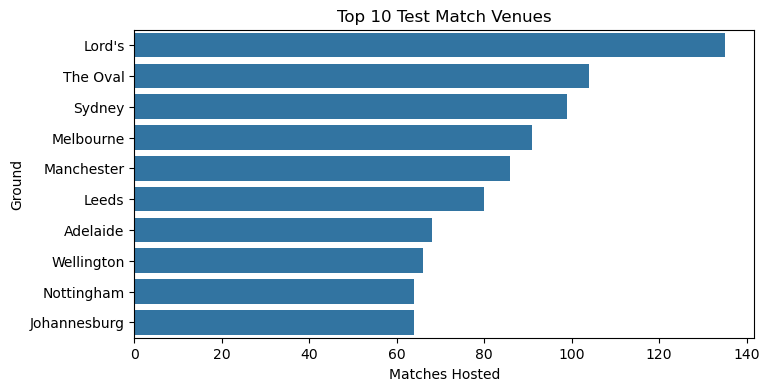

In [36]:
plt.figure(figsize=(8,4))
sns.barplot(y=venue_counts.index, x=venue_counts.values)
plt.title('Top 10 Test Match Venues')
plt.xlabel('Matches Hosted')
plt.ylabel('Ground')

wins in decade by country

In [37]:
dom = df.groupby(['Decade','Winner']).size().reset_index(name='Wins')
dom['Winner'] = dom['Winner'].str.strip()
dom = dom[dom['Winner'] != 'Drawn']
dom = dom[dom['Winner'] != 'tied']
dom = dom[dom['Winner'] != 'no result']
dom

,Decade,Winner,Wins
0,1870s,Australia,2
1,1880s,Australia,7
3,1880s,England,16
4,1890s,Australia,7
6,1890s,England,15
...,...,...,...
109,2020s,Pakistan,13
110,2020s,South Africa,17
111,2020s,Sri Lanka,12
112,2020s,West Indies,12


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '1870s'),
  Text(1, 0, '1880s'),
  Text(2, 0, '1890s'),
  Text(3, 0, '1900s'),
  Text(4, 0, '1910s'),
  Text(5, 0, '1920s'),
  Text(6, 0, '1930s'),
  Text(7, 0, '1940s'),
  Text(8, 0, '1950s'),
  Text(9, 0, '1960s'),
  Text(10, 0, '1970s'),
  Text(11, 0, '1980s'),
  Text(12, 0, '1990s'),
  Text(13, 0, '2000s'),
  Text(14, 0, '2010s'),
  Text(15, 0, '2020s')])

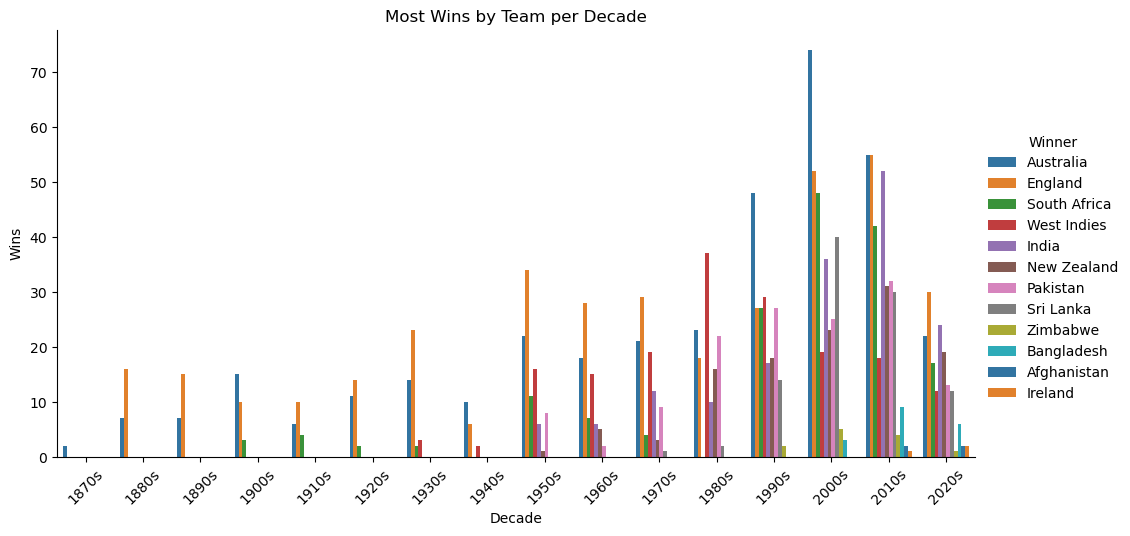

In [38]:
sns.catplot(
    data=dom,
    x='Decade', y='Wins', hue='Winner',
    kind='bar', height=5, aspect=2, palette='tab10'
)
plt.title('Most Wins by Team per Decade')
plt.xticks(rotation=45)

team result

In [39]:
drw = df.groupby(['Team 1','Result']).size().reset_index(name='Count')
drw= drw.drop([0,9]).reset_index(drop=True)
drw

,Team 1,Result,Count
0,Australia,Found,316
1,Australia,Not Found,72
2,Bangladesh,Found,59
3,Bangladesh,Not Found,11
4,England,Found,357
5,England,Not Found,172
6,India,Found,166
7,India,Not Found,97
8,New Zealand,Found,144
9,New Zealand,Not Found,77


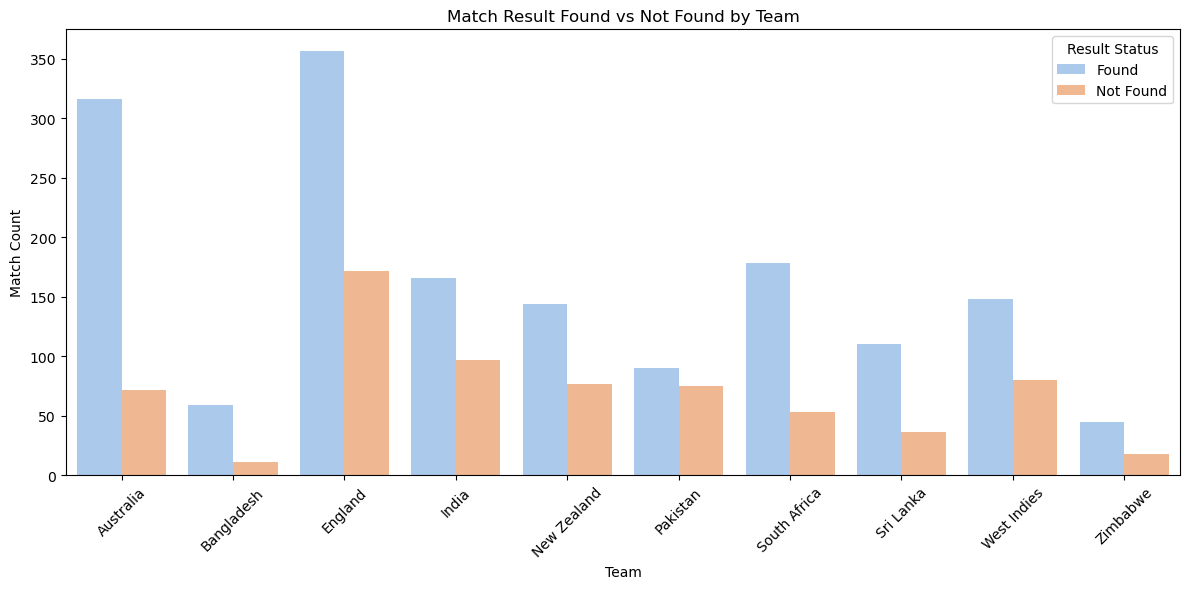

In [40]:
drw = drw.rename(columns={'Team 1': 'Team'})

plt.figure(figsize=(12,6))
sns.barplot(data=drw, x='Team', y='Count', hue='Result', palette='pastel')

plt.title('Match Result Found vs Not Found by Team')
plt.xlabel('Team')
plt.ylabel('Match Count')
plt.xticks(rotation=45)
plt.legend(title='Result Status')
plt.tight_layout()

In [41]:
drwp = drw.pivot(index='Team', columns='Result', values='Count').fillna(0)
drwp['Draw Percentage'] = ((drwp['Not Found']/(drwp['Found'] + drwp['Not Found']))*100).round(1)
drwp

Result,Found,Not Found,Draw Percentage
Team,,,
Australia,316,72,18.6
Bangladesh,59,11,15.7
England,357,172,32.5
India,166,97,36.9
New Zealand,144,77,34.8
Pakistan,90,75,45.5
South Africa,178,53,22.9
Sri Lanka,110,36,24.7
West Indies,148,80,35.1


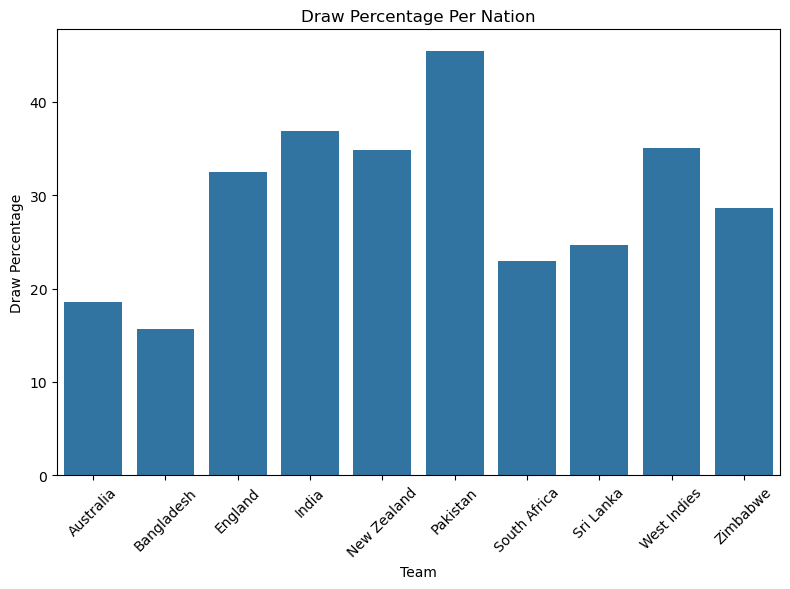

In [42]:
plt.figure(figsize=(8,6))
sns.barplot(x='Team',y='Draw Percentage',data=drwp)
plt.title('Draw Percentage Per Nation')
plt.xlabel('Team')
plt.ylabel('Draw Percentage')
plt.xticks(rotation=45)
plt.tight_layout()

matches by month.

In [43]:
df['Month'] = df['Match Start Date'].dt.month_name()

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
month_counts = df['Month'].value_counts().reindex(month_order)

Text(0.5, 0, 'Month')

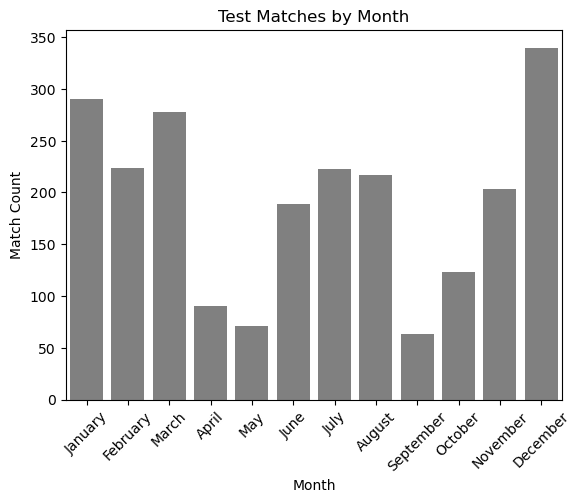

In [44]:
sns.barplot(x=month_counts.index, y=month_counts.values, color='grey')
plt.xticks(rotation=45)
plt.title('Test Matches by Month')
plt.ylabel('Match Count')
plt.xlabel('Month')

checking tests ends on which days mostly.

In [47]:
df['Duration (days)'] = (df['Match End Date'] - df['Match Start Date']).dt.days + 1

In [48]:
dur = df.groupby(['Decade','Duration (days)']).size().reset_index(name='Count')
dur = dur[dur['Duration (days)'] <= 5]

<Axes: xlabel='Decade', ylabel='Count'>

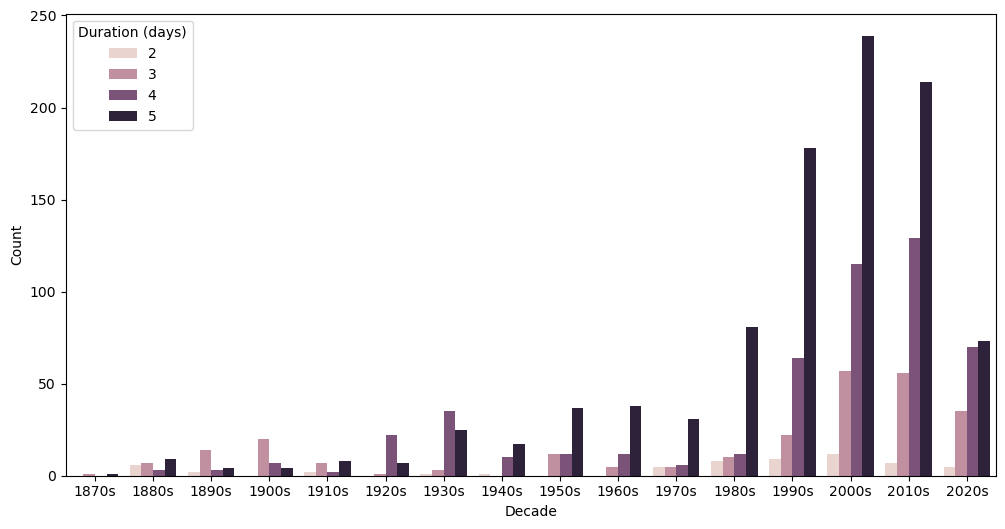

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(x='Decade',y='Count',hue='Duration (days)',data=dur)

and answer is 5 days.

rivalries

In [50]:
df_rivalry = df.groupby(['Team 1', 'Team 2']).size().reset_index(name='Matches')
df_rivalry_sorted = df_rivalry.sort_values(by='Matches', ascending=False).head(5)
df_rivalry_sorted

,Team 1,Team 2,Matches
24,England,Australia,162
4,Australia,England,143
32,England,West Indies,90
66,South Africa,England,78
26,England,India,68


In [51]:
df_rivalry_sorted['Matchup'] = df_rivalry_sorted['Team 1'] + ' vs ' + df_rivalry_sorted['Team 2']
df_rivalry_sorted.drop(['Team 1', 'Team 2'], axis=1, inplace=True)
df_rivalry_sorted

,Matches,Matchup
24,162,England vs Australia
4,143,Australia vs England
32,90,England vs West Indies
66,78,South Africa vs England
26,68,England vs India


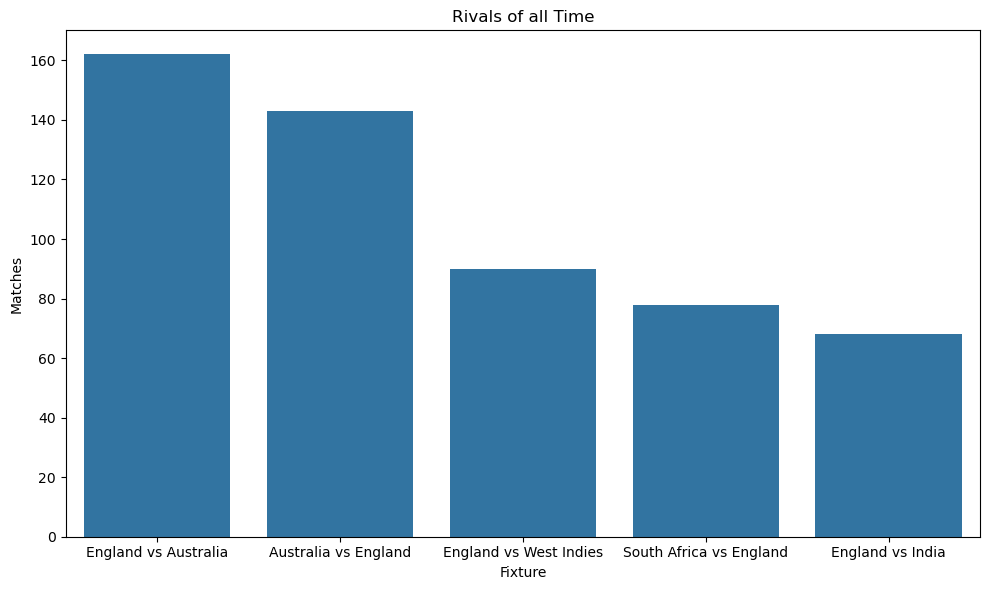

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x='Matchup',y='Matches',data=df_rivalry_sorted)
plt.title('Rivals of all Time')
plt.xlabel('Fixture')
plt.ylabel('Matches')
#plt.xticks(rotation=30)
plt.tight_layout()